<a href="https://colab.research.google.com/github/currieea/MML-Book/blob/master/notebooks/ECE570/06_gradient_descent_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

David I. Inouye

## Most AI/ML Optimizations Must Be **Numerically** Optimized

-   One common algorithm is **gradient descent**
    -   Primary algorithm for deep learning
    -   Works in very high dimensions
-   Other optimization algorithms
    -   Expectation Maximization (alternating optimization)
    -   Sampling-based optimization (MCMC/Gibb)
    -   Greedy optimization (e.g., decision trees)

------------------------------------------------------------------------

## Gradient Descent Is Like Taking Steps Down the Steepest Descent Into a Valley

![](attachment:images/06-gradient-descent/gradient_descent_.png)

https://www.hackerearth.com/blog/developers/3-types-gradient-descent-algorithms-small-large-data-sets/

------------------------------------------------------------------------

## Vanilla **Gradient Descent (GD)** Has Simple Form

-   Objective (**Loss**) function denoted by
    $\mathcal{L}(\theta;\mathcal{D})$:
    $$\underset{\theta}{\operatorname{argmin}} \mathcal{L}(\theta;\mathcal{D})$$

1.  Start at random parameter, e.g., $\theta^{0} \sim \mathcal{N}(0,1)$
2.  Iteratively update parameter via **negative gradient** of loss
    function ($\eta_{t}$ is step size or learning rate)
    $$\color{green}{\theta^{t+1}}=\color{blue}{\theta^{t}}-\color{red}{\eta_{t}}\nabla_{\theta}\mathcal{L}(\color{blue}{\theta^{t}})$$
    -   $\eta_{t}$ is **learning rate** (or **step size**)

------------------------------------------------------------------------

## **Stochastic Gradient Descent (SGD)** Merely Uses One Sample in the Gradient Calculation

-   The loss function can usually be split into a summation of losses
    $l(\theta;x_{i})$ for each sample $x_{i}$:

    -   $\mathcal{L}(\theta;\mathcal{D})=\frac{1}{n}\sum_{i=1}^{n}l(\theta;x_{i})$

-   SGD approximates the full gradient by the gradient of a single
    sample

  - $\nabla_{\theta}\mathcal{L}(\theta^{t};\mathcal{D}) \approx \nabla_{\theta}l(\theta^{t};x_{i})$
  -   Theoretically,
        $\mathbb{E}_{i}[\nabla_{\theta}l(\theta^{t};x_{i})] = \nabla_{\theta}\mathcal{L}(\theta^{t};\mathcal{D})$

-   Loop through all $x_{i} \in \mathcal{D}$ (One pass through dataset)
    $$\color{green}{\tilde{\theta}^{t+1}}=\color{blue}{\theta^{t}}-\color{red}{\eta_{t}}\nabla_{\theta}l(\color{blue}{\theta^{t}};x_{i})$$

    -   GD: 1 large update with $O(n)$ cost
    -   SGD: $n$ smaller updates with $O(1)$ cost each

------------------------------------------------------------------------

## **Stochastic Gradient Descent (SGD)** Merely Uses One Sample in the Gradient Calculation

<figure>
<img src="attachment:images/06-gradient-descent/gradient.png"
alt="Full gradient is average over single sample gradients. This is why it is “stochastic”." />
<figcaption aria-hidden="true">Full gradient is average over single
sample gradients. This is why it is “stochastic”.</figcaption>
</figure>

![](attachment:images/06-gradient-descent/slide06_pic1_Stochastic_gradient_descent_SGD_merely_uses_one_sample_in_th.png)

https://golden.com/wiki/Stochastic_gradient_descent\_(SGD)

------------------------------------------------------------------------

## **Mini-Batch SGD** (**or Just SGD**) Uses a Small Batch of Samples in the Gradient Calculation

-   **Mini-batch SGD** approximates the full gradient by the gradient of
    a batch of samples
    -   Sample mini-batch
        $$\theta^{t+1}=\theta^{t}-\eta_{t}\sum_{k=1}^{b}\frac{1}{b}\nabla_{\theta}l(\theta^{t};x_{k})$$
-   One pass through dataset
    -   GD: 1 large update
    -   SGD: $n$ smaller updates
    -   Mini-batch SGD: $\frac{n}{b}$ medium-size updates

------------------------------------------------------------------------

## Gradient Descent Demo for Simplified Logistic Regression

------------------------------------------------------------------------

## Create Simple Logistic Data and Plot True Model

(100,)


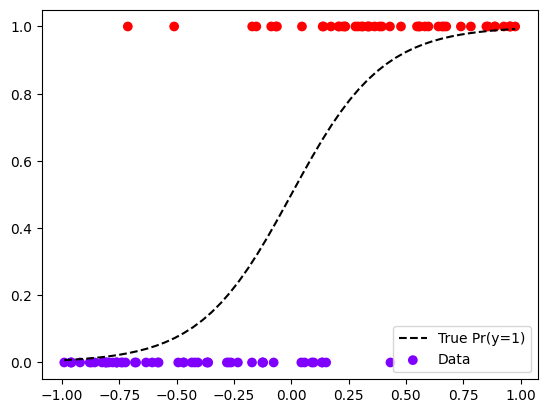

In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Create simple logistic data
rng = np.random.RandomState(0)
n_samples = 100
x = 2*(rng.rand(n_samples)-0.5) # generates 100 random numbers between -1 and 1

theta_true = 5
# Very simplified logistic regression model with only 1 parameter
def model(x, theta):
    return 1 / (1 + np.exp(-x.dot(theta)))
y = (rng.rand(*x.shape) <= model(x, theta_true)).astype(float)
print(y.shape)
# Plot data
xq = np.linspace(np.min(x), np.max(x))
plt.plot(xq, model(xq, theta_true), '--k', label='True Pr(y=1)')
plt.scatter(x, y, c=y, cmap='rainbow', label='Data')
plt.legend();

------------------------------------------------------------------------

## Define the Logistic Loss (Negative Log-Likelihood)

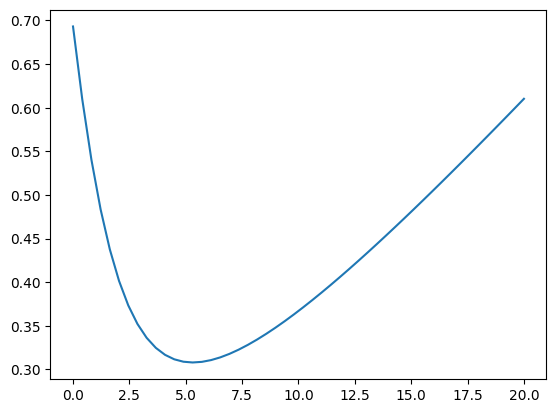

In [7]:
def objective(x, y, theta):
    prob = model(x, theta)
    return -np.mean(y * np.log(prob) + (1-y) * np.log(1 - prob))

theta_arr = np.linspace(0, 20)
obj_arr = [objective(x, y, theta) for theta in theta_arr]
plt.plot(theta_arr, obj_arr);

### NOTE: Because of randomness, empirical estimate will not exactly match true model. (e.g., this has a minimum closer to 5.3 or so

## Explicitly compute (by hand) the gradient of the function

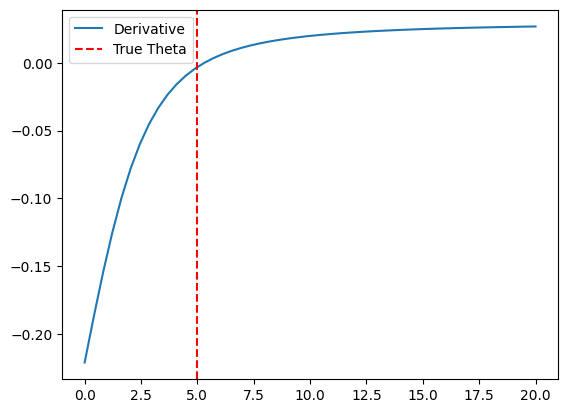

In [9]:
def grad_objective(x, y, theta):
    #See https://web.stanford.edu/~jurafsky/slp3/5.pdf
    return np.mean((model(x, theta) - y) * x)

grad_arr = [grad_objective(x, y, theta) for theta in theta_arr]
plt.plot(theta_arr, grad_arr, label='Derivative')
plt.axvline(5, linestyle='--', color='r', label='True Theta')
plt.legend();

# Gradient Descent with various step sizes

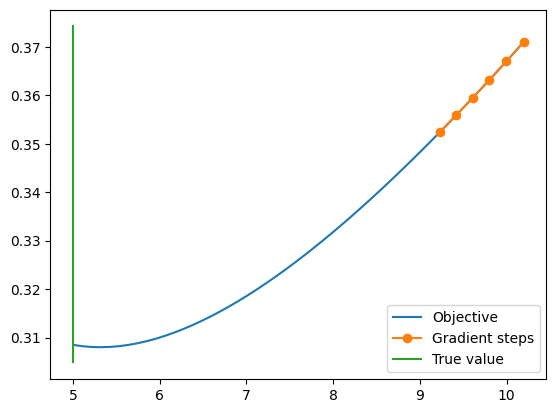

In [13]:
# Gradient descent parameters
max_iter = 5
step_size = 10
sgd = False
if sgd: max_iter *= 10 # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2 # An arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
    if sgd:
        # Select random data point
        rand_idx = rng.randint(len(y))
        xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
    else:
        # Use all data points in gradient calculation
        xg, yg = x, y
    grad = grad_objective(xg, yg, theta_hat)
    theta_hat = theta_hat - step_size * grad

    # Save estimates for visualization
    theta_hat_arr.append(theta_hat)
    obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective')
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True value')
plt.legend();

# Gradient Descent with various step sizes

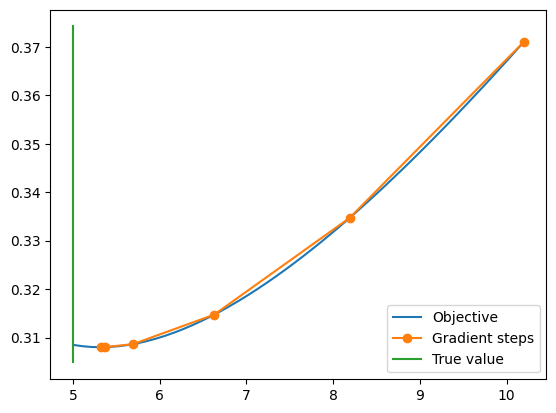

In [15]:
# Gradient descent parameters
max_iter = 5
step_size = 100
sgd = False
if sgd: max_iter *= 10 # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2 # An arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
    if sgd:
        # Select random data point
        rand_idx = rng.randint(len(y))
        xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
    else:
        # Use all data points in gradient calculation
        xg, yg = x, y
    grad = grad_objective(xg, yg, theta_hat)
    theta_hat = theta_hat - step_size * grad

    # Save estimates for visualization
    theta_hat_arr.append(theta_hat)
    obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective')
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True value')
plt.legend();

# Gradient Descent with various step sizes

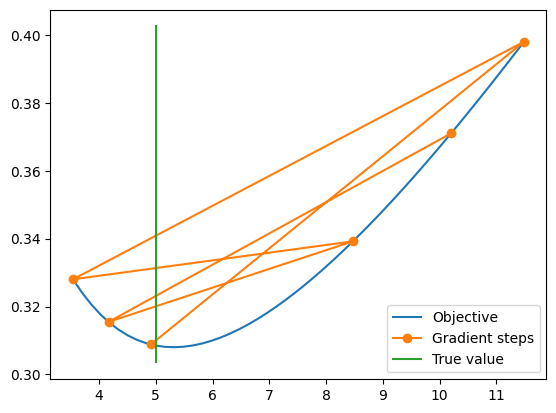

In [18]:
# Gradient descent parameters
max_iter = 5
step_size = 300
sgd = False
if sgd: max_iter *= 10 # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2 # An arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
    if sgd:
        # Select random data point
        rand_idx = rng.randint(len(y))
        xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
    else:
        # Use all data points in gradient calculation
        xg, yg = x, y
    grad = grad_objective(xg, yg, theta_hat)
    theta_hat = theta_hat - step_size * grad

    # Save estimates for visualization
    theta_hat_arr.append(theta_hat)
    obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective')
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True value')
plt.legend();

# SGD with various step sizes

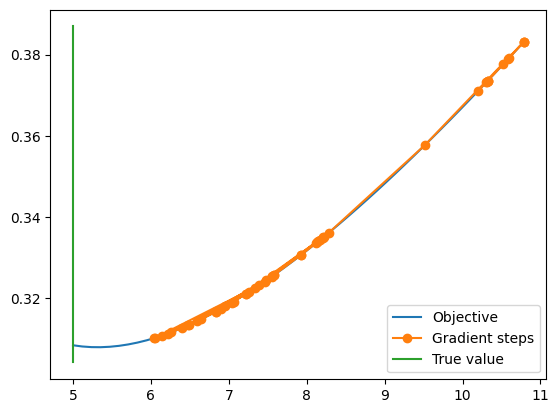

In [19]:
# Gradient descent parameters
max_iter = 5
step_size = 10
sgd = True
if sgd: max_iter *= 10 # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2 # An arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
    if sgd:
        # Select random data point
        rand_idx = rng.randint(len(y))
        xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
    else:
        # Use all data points in gradient calculation
        xg, yg = x, y
    grad = grad_objective(xg, yg, theta_hat)
    theta_hat = theta_hat - step_size * grad

    # Save estimates for visualization
    theta_hat_arr.append(theta_hat)
    obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective')
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True value')
plt.legend();

# SGD with various step sizes

/tmp/ipython-input-1983190392.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(prob) + (1-y) * np.log(1 - prob))
/tmp/ipython-input-1983190392.py:3: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(prob) + (1-y) * np.log(1 - prob))


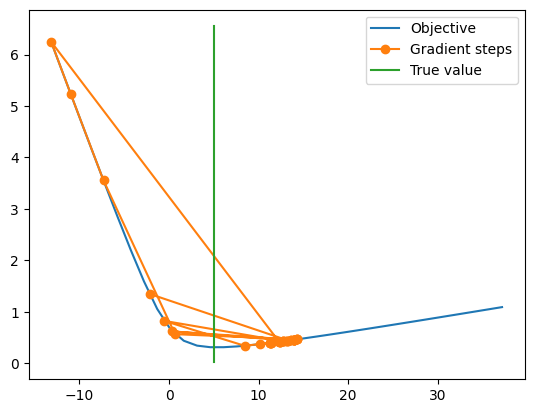

In [20]:
# Gradient descent parameters
max_iter = 5
step_size = 100
sgd = True
if sgd: max_iter *= 10 # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2 # An arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
    if sgd:
        # Select random data point
        rand_idx = rng.randint(len(y))
        xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
    else:
        # Use all data points in gradient calculation
        xg, yg = x, y
    grad = grad_objective(xg, yg, theta_hat)
    theta_hat = theta_hat - step_size * grad

    # Save estimates for visualization
    theta_hat_arr.append(theta_hat)
    obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective')
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True value')
plt.legend();

## SGD with various step sizes

/tmp/ipython-input-1983190392.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(prob) + (1-y) * np.log(1 - prob))
/tmp/ipython-input-1983190392.py:3: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(prob) + (1-y) * np.log(1 - prob))


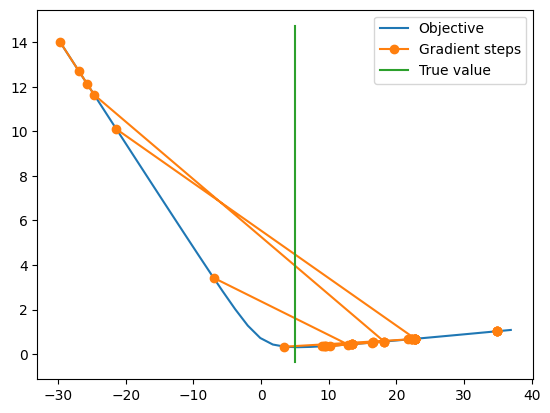

In [21]:
# Gradient descent parameters
max_iter = 5
step_size = 300
sgd = True
if sgd: max_iter *= 10 # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2 # An arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
    if sgd:
        # Select random data point
        rand_idx = rng.randint(len(y))
        xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
    else:
        # Use all data points in gradient calculation
        xg, yg = x, y
    grad = grad_objective(xg, yg, theta_hat)
    theta_hat = theta_hat - step_size * grad

    # Save estimates for visualization
    theta_hat_arr.append(theta_hat)
    obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective')
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True value')
plt.legend();

------------------------------------------------------------------------

## **Learning Rate / Step Size** Is Critical for Convergence and Correctness of Algorithm

-   If learning rate is **too high**, the algorithm could
    <span style="color:red">diverge</span>.
    -   Diverge means to get farther away from the solution.
-   If learning rate **too low**, the algorithm could take a very long
    time to converge.

![](attachment:images/06-gradient-descent/slide09_pic1_Learning_rate_step_size_is_critical_for_convergence_and_corr.png)

https://www.jeremyjordan.me/nn-learning-rate/

------------------------------------------------------------------------

## Adaptive Learning Rates May Help **(but Not Always)**

-   Decreasing step size, $\eta_{t}=\frac{1}{t}$
    -   Intuition: Approaches 0 but can cover an infinite distance since
        $\lim_{a\rightarrow\infty}\sum_{t=1}^{a}\frac{1}{t}=\infty$
-   ADAM - Adaptive Moment Estimation
-   See <https://pytorch.org/docs/stable/optim.html> for more options

------------------------------------------------------------------------

## **Parameter Initialization** Can Be Important if Non-Convex or Step Size Incorrect

-   If convex function, initial parameter $\theta^{0}$ **will not**
    affect final optimization result
    $\theta= \text{argmin } \mathcal{L}(\theta)$.
    -   Yay! (Assuming appropriate step size.)

![](attachment:images/06-gradient-descent/convex_.png)

-   If non-convex, starting position **WILL** affect final converged
    $\theta$.
    -   Sad day. (But sometimes it’s not too bad in practice.)

![](attachment:images/06-gradient-descent/non-convex_.png)